In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import os 
import tqdm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
sns.set_theme(style="white", context="talk", palette="muted")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,         
    'axes.titlesize': 15,
    'axes.labelsize': 13,    
    'legend.fontsize': 11,   
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 100
})

In [3]:
# Read config.yaml
with open('../configs/config_gogounou.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

# extract data params
data_params = config['data_params']

### Read the csv file

In [4]:
dataset_path = data_params['data_path'] + 'raw/' + data_params['dataset']
data = pd.read_csv(dataset_path)  
data.head()

,DATE,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
0,31/1/1981,97.82,22.08,39.25,57.25,2.52,0.57,NaN,NaN,0.00,NaN,NaN
1,28/2/1981,97.63,26.39,29.56,77.38,2.44,0.54,NaN,NaN,0.00,NaN,NaN
2,31/3/1981,97.55,30.10,41.06,147.19,2.17,0.52,NaN,NaN,5.27,NaN,NaN
3,30/4/1981,97.46,30.56,54.75,212.19,2.57,0.52,NaN,NaN,52.73,NaN,NaN
4,31/5/1981,97.65,27.81,73.25,225.06,2.16,0.52,NaN,NaN,100.20,NaN,NaN


In [5]:
dataset_path

'../datasets/raw/Gogounou_with_SPI6.csv'

In [6]:
# Ensure the date column is a datetime
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)

# Set the date column as the index and drop it from the columns
data = data.set_index('DATE')

data.head()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,97.82,22.08,39.25,57.25,2.52,0.57,NaN,NaN,0.00,NaN,NaN
1981-02-28,97.63,26.39,29.56,77.38,2.44,0.54,NaN,NaN,0.00,NaN,NaN
1981-03-31,97.55,30.10,41.06,147.19,2.17,0.52,NaN,NaN,5.27,NaN,NaN
1981-04-30,97.46,30.56,54.75,212.19,2.57,0.52,NaN,NaN,52.73,NaN,NaN
1981-05-31,97.65,27.81,73.25,225.06,2.16,0.52,NaN,NaN,100.20,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 492 entries, 1981-01-31 to 2021-12-31
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PS                 492 non-null    float64
 1   T2M                492 non-null    float64
 2   RH2M               492 non-null    float64
 3   WD2M               492 non-null    float64
 4   WS2M               492 non-null    float64
 5   GWETPROF           492 non-null    float64
 6   CLOUD_AMT          456 non-null    float64
 7   TOA_SW_DWN         456 non-null    float64
 8   PRECTOTCORR_SUM    492 non-null    float64
 9   ALLSKY_SFC_SW_DWN  456 non-null    float64
 10  SPI6               487 non-null    float64
dtypes: float64(11)
memory usage: 46.1 KB


In [8]:
data.describe()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,456.000000,456.000000,492.000000,456.000000,4.870000e+02
mean,97.700183,27.161728,56.772053,157.327073,2.101260,0.555183,52.638421,35.357149,75.467886,19.951557,5.580751e-16
std,0.142361,2.476157,21.923493,68.178655,0.496826,0.064288,20.386864,2.406505,90.232416,1.733348,1.000000e+00
min,97.270000,20.690000,14.190000,27.560000,1.200000,0.480000,8.800000,30.730000,0.000000,15.120000,-1.461751e+00
25%,97.600000,25.510000,37.425000,79.090000,1.677500,0.510000,33.357500,33.817500,0.000000,18.690000,-9.709171e-01
50%,97.730000,26.415000,59.405000,191.125000,2.130000,0.530000,58.950000,36.800000,31.640000,20.055000,-1.633797e-02
75%,97.810000,29.012500,77.880000,216.652500,2.450000,0.590000,69.242500,37.142500,142.380000,21.122500,8.447635e-01
max,98.110000,33.710000,86.940000,276.940000,3.680000,0.800000,87.590000,37.830000,384.960000,24.540000,2.532608e+00


In [9]:
data.isnull().sum()

PS                    0
T2M                   0
RH2M                  0
WD2M                  0
WS2M                  0
GWETPROF              0
CLOUD_AMT            36
TOA_SW_DWN           36
PRECTOTCORR_SUM       0
ALLSKY_SFC_SW_DWN    36
SPI6                  5
dtype: int64

In [10]:
data.isnull().sum()/len(data)*100

PS                   0.000000
T2M                  0.000000
RH2M                 0.000000
WD2M                 0.000000
WS2M                 0.000000
GWETPROF             0.000000
CLOUD_AMT            7.317073
TOA_SW_DWN           7.317073
PRECTOTCORR_SUM      0.000000
ALLSKY_SFC_SW_DWN    7.317073
SPI6                 1.016260
dtype: float64

The target variable presents 5 missing entries, and covariates CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN have respectively 36 missing values ($\textbf{7.317\%}$) of the total. They will be all removed to avoid noise, additional bias, and perturbation.

### Remove (CLOUD_AMT,  TOA_SW_DWN, and ALLSKY_SFC_SW_DWN) covariates and first five entries of the dataset

In [11]:
data[:7]

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,CLOUD_AMT,TOA_SW_DWN,PRECTOTCORR_SUM,ALLSKY_SFC_SW_DWN,SPI6
DATE,,,,,,,,,,,
1981-01-31,97.82,22.08,39.25,57.25,2.52,0.57,NaN,NaN,0.00,NaN,NaN
1981-02-28,97.63,26.39,29.56,77.38,2.44,0.54,NaN,NaN,0.00,NaN,NaN
1981-03-31,97.55,30.10,41.06,147.19,2.17,0.52,NaN,NaN,5.27,NaN,NaN
1981-04-30,97.46,30.56,54.75,212.19,2.57,0.52,NaN,NaN,52.73,NaN,NaN
1981-05-31,97.65,27.81,73.25,225.06,2.16,0.52,NaN,NaN,100.20,NaN,NaN
1981-06-30,97.80,27.66,72.50,213.81,2.23,0.54,NaN,NaN,189.84,NaN,-0.344705
1981-07-31,97.83,25.20,83.19,228.88,2.10,0.61,NaN,NaN,268.95,NaN,0.518499


In [12]:
COLUMNS_TO_REMOVE = ['CLOUD_AMT', 'TOA_SW_DWN', 'ALLSKY_SFC_SW_DWN']
data = data.drop(columns=COLUMNS_TO_REMOVE, axis=1).dropna()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 1981-06-30 to 2021-12-31
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PS               487 non-null    float64
 1   T2M              487 non-null    float64
 2   RH2M             487 non-null    float64
 3   WD2M             487 non-null    float64
 4   WS2M             487 non-null    float64
 5   GWETPROF         487 non-null    float64
 6   PRECTOTCORR_SUM  487 non-null    float64
 7   SPI6             487 non-null    float64
dtypes: float64(8)
memory usage: 34.2 KB


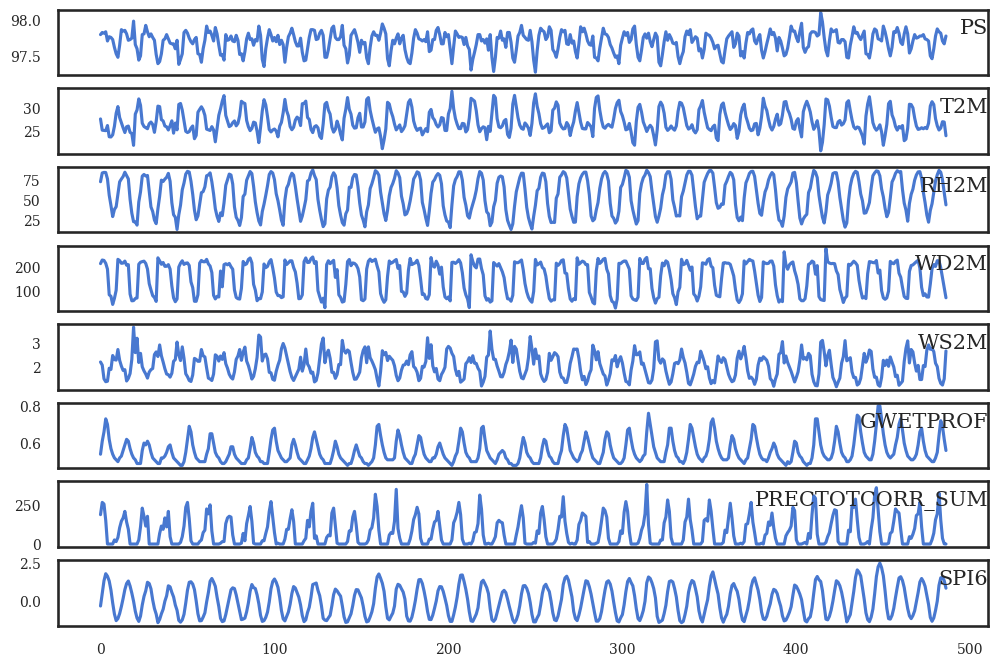

In [14]:
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7]
i = 1
# plot each column
plt.figure(figsize=(12,8))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(data.values[:, group])
 plt.title(data.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

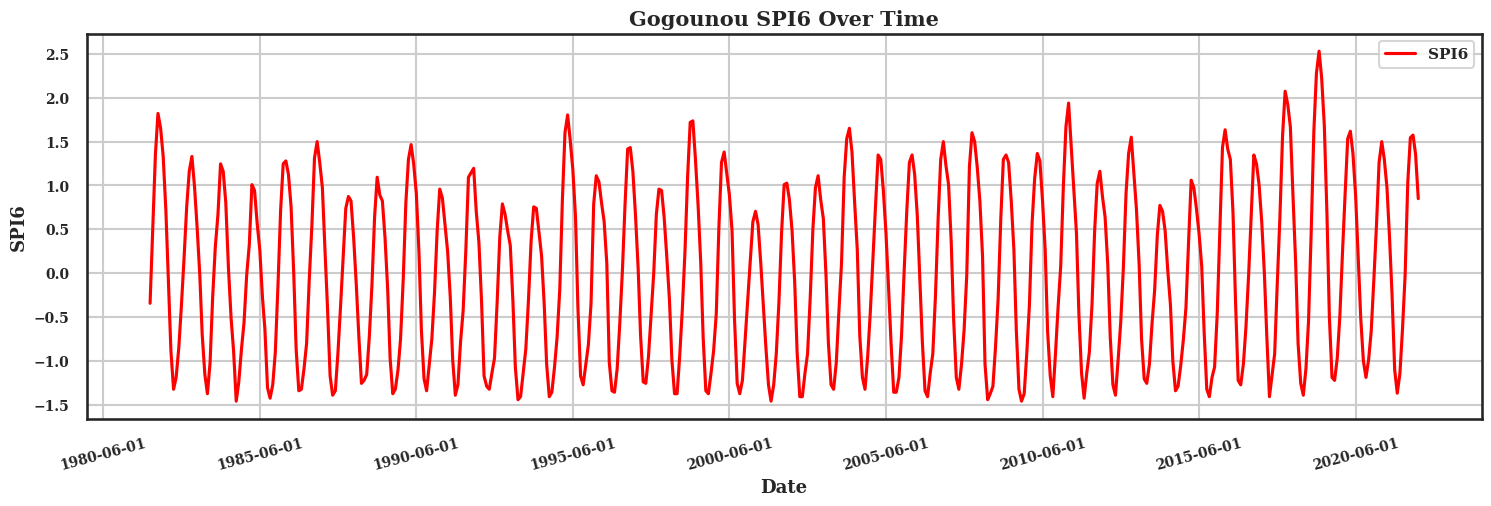

In [16]:
import matplotlib.dates as mdates

# Plot SPI6 in function of Date
plt.figure(figsize=(18, 5))
plt.plot(data.index, data['SPI6'], label='SPI6', color='red')

# Adding grid
plt.grid(True)

# Adding Title
plt.title(data_params['city'] + ' SPI6 Over Time', fontweight='bold')

# Annotating x and y axis
plt.xlabel('Date', fontweight='bold')
plt.ylabel('SPI6', fontweight='bold')

# Rotate dates on x-axis and bold the ticks
plt.xticks(rotation=15, fontweight='bold')
plt.yticks(fontweight='bold')

# Adding legend with bold font
plt.legend(prop={'weight': 'bold'}, fontsize='large')

# Set the major locator for x-axis to show every 5th year in June
five_years = mdates.YearLocator(5)  # every 5 years
june_locator = mdates.MonthLocator(6)  # Add ticks only for June
plt.gca().xaxis.set_major_locator(five_years)
plt.gca().xaxis.set_minor_locator(june_locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust the format to only show June 1st for every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-06-01'))

# Saving the figure before showing
plt.savefig(data_params['save_path'] + data_params['city'] + '/spi6_plot.png')

# Show the plot
plt.show()


#### Normalization
 The scale of the features are big comparatively to the target SPI6. Let's normalize those features 

In [15]:
target_column = 'SPI6'

In [21]:
feature_range = (-1, 1)

# Separate the target column from the other columns
features = data.drop(columns=[target_column])
target = data[target_column]

# Initialize and fit scaler on train data if needed
scaler_type = data_params['scaling_type']
if scaler_type == 'minmax':
    scaler = MinMaxScaler(feature_range=feature_range)
elif scaler_type == 'standard':
    scaler = StandardScaler()
elif scaler_type == 'none':
    scaler = None
else:
    raise ValueError(f"Unsupported scaler_type: {scaler_type}")

normalized_features = scaler.fit_transform(features)

# Convert the normalized features back to a DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns, index=data.index)

# Reconstruct the DataFrame with the normalized columns and the target column
normalized_data = pd.concat([normalized_features_df, target], axis=1)

# Display the head of the new DataFrame
normalized_data.head()

,PS,T2M,RH2M,WD2M,WS2M,GWETPROF,PRECTOTCORR_SUM,SPI6
DATE,,,,,,,,
1981-06-30,0.261905,0.070661,0.603024,0.493704,-0.169355,-0.6250,-0.013716,-0.344705
1981-07-31,0.333333,-0.307220,0.896907,0.614564,-0.274194,-0.1875,0.397288,0.518499
1981-08-31,0.309524,-0.314900,0.915876,0.599968,-0.733871,0.1250,0.342477,1.347842
1981-09-30,0.357143,-0.322581,0.912302,0.504772,-0.830645,0.5625,-0.205476,1.821761
1981-10-31,0.047619,-0.150538,0.695945,0.308766,-0.814516,0.3750,-1.000000,1.652523


### Pearson Correlation

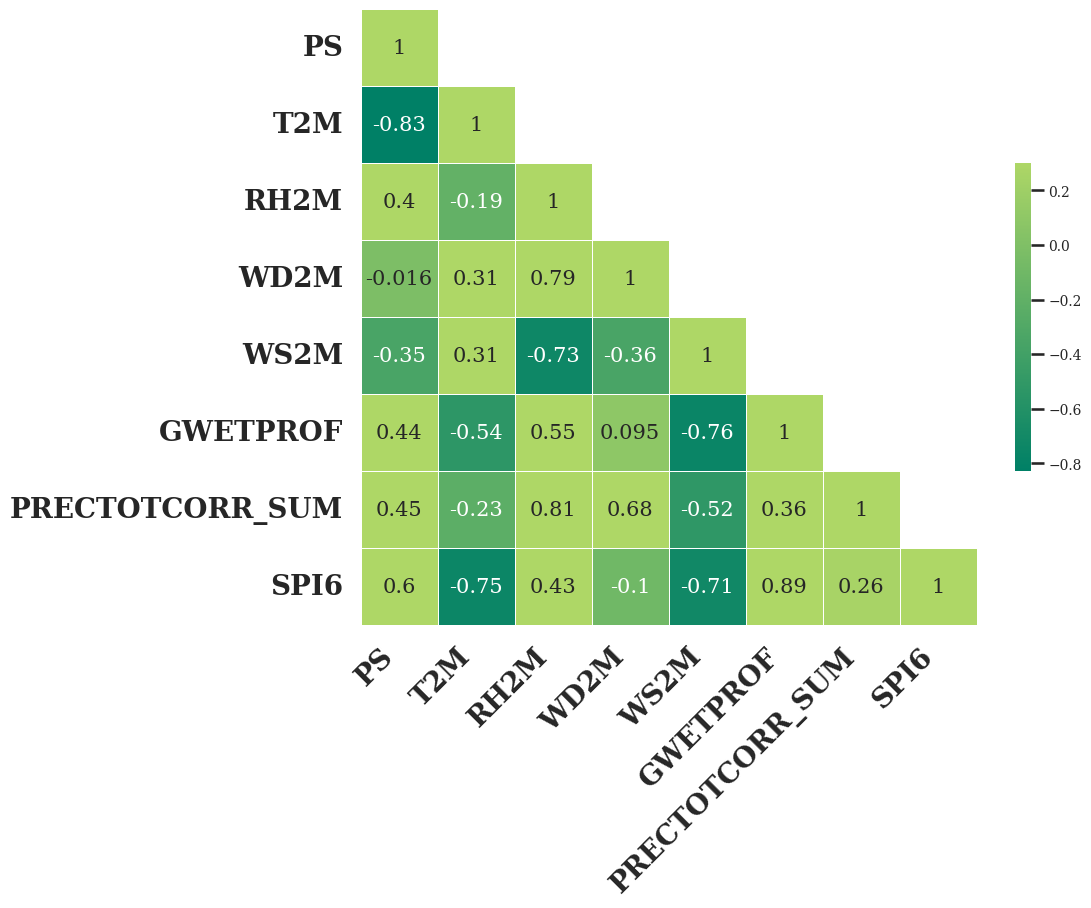

In [22]:
# Compute the correlation matrix
corr = normalized_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
# plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = 'summer'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":15})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=20, fontweight='bold')
plt.savefig('heatmap correlation Pix1')

#### Let's focus on the corelations between each variable and target variable

In [23]:
correlations_data = normalized_data.corr()[target_column].sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.893671
PS                 0.599878
RH2M               0.430562
PRECTOTCORR_SUM    0.257885
WD2M              -0.101641
WS2M              -0.711812
T2M               -0.749674
Name: SPI6, dtype: float64

In [24]:
correlations_data = np.abs(normalized_data.corr()[target_column]).sort_values(ascending=False)
correlations_data

SPI6               1.000000
GWETPROF           0.893671
T2M                0.749674
WS2M               0.711812
PS                 0.599878
RH2M               0.430562
PRECTOTCORR_SUM    0.257885
WD2M               0.101641
Name: SPI6, dtype: float64

normalized_data = normalized_data.drop(columns=['WD2M'])
normalized_data.head()

No need of WD2M covariate removal compared to the previous dataset

In [25]:
no_lagged_data_path = data_params['data_path'] + 'no_lagged/' + data_params['city'] + '_no_lagged.csv'
normalized_data.to_csv(no_lagged_data_path)

### Transform dataset for Time series forecasting

In [30]:
import sys
sys.path.append('../')

from models.utils import create_lagged_features

In [31]:
col_names = list(normalized_data.columns)
print(col_names)

['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM', 'SPI6']


In [32]:
lagged_selected_columns = ['SPI6(t)']

In [33]:
lagged_data = create_lagged_features(data= normalized_data, 
                                      col_names=col_names,
                                      n_in=data_params['window_size'],
                                      n_out=data_params['n_output_steps'],
                                      dropnan=True)

lagged_data.head()

,PS(t-5),T2M(t-5),RH2M(t-5),WD2M(t-5),WS2M(t-5),GWETPROF(t-5),PRECTOTCORR_SUM(t-5),SPI6(t-5),PS(t-4),T2M(t-4),...,PRECTOTCORR_SUM(t-1),SPI6(t-1),PS(t),T2M(t),RH2M(t),WD2M(t),WS2M(t),GWETPROF(t),PRECTOTCORR_SUM(t),SPI6(t)
DATE,,,,,,,,,,,,,,,,,,,,,
1981-11-30,0.261905,0.070661,0.603024,0.493704,-0.169355,-0.6250,-0.013716,-0.344705,0.333333,-0.307220,...,-1.000000,1.652523,0.190476,-0.528418,0.152715,-0.551367,-0.379032,-0.1250,-1.000000,1.330927
1981-12-31,0.333333,-0.307220,0.896907,0.614564,-0.274194,-0.1875,0.397288,0.518499,0.309524,-0.314900,...,-1.000000,1.330927,0.166667,-0.534562,-0.192577,-0.602534,-0.419355,-0.4375,-1.000000,0.721630
1982-01-31,0.309524,-0.314900,0.915876,0.599968,-0.733871,0.1250,0.342477,1.347842,0.357143,-0.322581,...,-1.000000,0.721630,0.095238,-0.462366,-0.567010,-0.876173,0.048387,-0.6250,-1.000000,-0.141574
1982-02-28,0.357143,-0.322581,0.912302,0.504772,-0.830645,0.5625,-0.205476,1.821761,0.047619,-0.150538,...,-1.000000,-0.141574,-0.166667,-0.175115,-0.328385,-0.674152,-0.088710,-0.7500,-0.862999,-0.886282
1982-03-31,0.047619,-0.150538,0.695945,0.308766,-0.814516,0.3750,-1.000000,1.652523,0.190476,-0.528418,...,-0.862999,-0.886282,-0.380952,0.262673,-0.235464,-0.398989,-0.104839,-0.8125,-0.917810,-1.326341


### Now we have 48 columns. Lets reduce them

### Select the most useful lags. 

Let's plot correlation matrice by including for each the target TWS and others with a  given lag_lenth

In [34]:
normalized_data.columns

Index(['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M', 'GWETPROF', 'PRECTOTCORR_SUM',
       'SPI6'],
      dtype='object')

In [35]:
lagged_data.columns

Index(['PS(t-5)', 'T2M(t-5)', 'RH2M(t-5)', 'WD2M(t-5)', 'WS2M(t-5)',
       'GWETPROF(t-5)', 'PRECTOTCORR_SUM(t-5)', 'SPI6(t-5)', 'PS(t-4)',
       'T2M(t-4)', 'RH2M(t-4)', 'WD2M(t-4)', 'WS2M(t-4)', 'GWETPROF(t-4)',
       'PRECTOTCORR_SUM(t-4)', 'SPI6(t-4)', 'PS(t-3)', 'T2M(t-3)', 'RH2M(t-3)',
       'WD2M(t-3)', 'WS2M(t-3)', 'GWETPROF(t-3)', 'PRECTOTCORR_SUM(t-3)',
       'SPI6(t-3)', 'PS(t-2)', 'T2M(t-2)', 'RH2M(t-2)', 'WD2M(t-2)',
       'WS2M(t-2)', 'GWETPROF(t-2)', 'PRECTOTCORR_SUM(t-2)', 'SPI6(t-2)',
       'PS(t-1)', 'T2M(t-1)', 'RH2M(t-1)', 'WD2M(t-1)', 'WS2M(t-1)',
       'GWETPROF(t-1)', 'PRECTOTCORR_SUM(t-1)', 'SPI6(t-1)', 'PS(t)', 'T2M(t)',
       'RH2M(t)', 'WD2M(t)', 'WS2M(t)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t)',
       'SPI6(t)'],
      dtype='object')

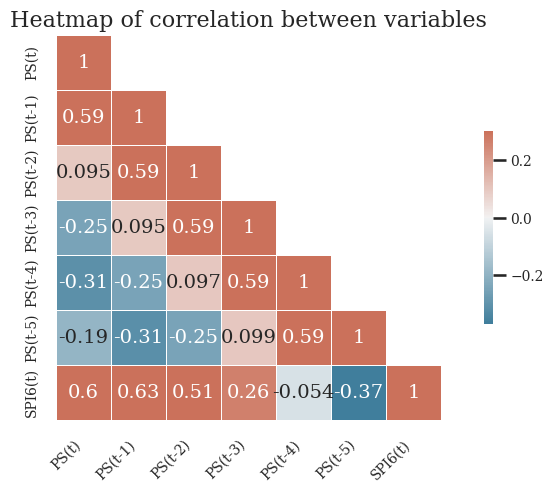

In [36]:
# Compute the correlation matrix : SPI6 and lag PS 

dfm1 = lagged_data[['PS(t)','PS(t-1)', 'PS(t-2)', 'PS(t-3)','PS(t-4)', 'PS(t-5)','SPI6(t)']]

corr = dfm1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [37]:
np.abs(dfm1.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)    1.000000
PS(t-1)    0.626711
PS(t)      0.600117
PS(t-2)    0.505915
PS(t-5)    0.367648
PS(t-3)    0.264600
PS(t-4)    0.053937
Name: SPI6(t), dtype: float64

#####  The lag 1 : PS(t-1) is the most correlated. So, we only keep it.

In [38]:
lagged_selected_columns.append('PS(t-1)')

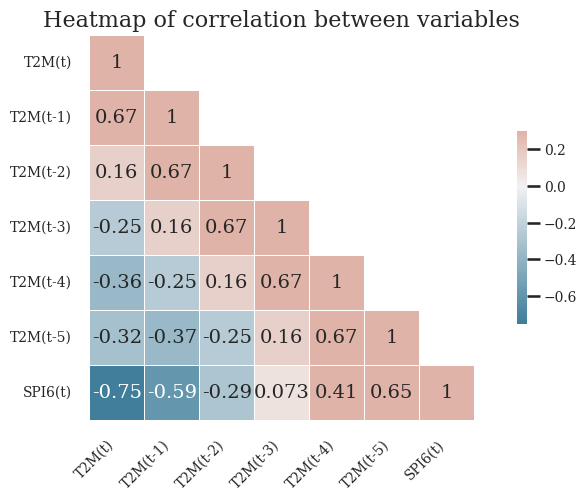

In [39]:
# Compute the correlation matrix : SPI6 and lag T2M

dfm2 = lagged_data[['T2M(t)','T2M(t-1)', 'T2M(t-2)', 'T2M(t-3)','T2M(t-4)', 'T2M(t-5)','SPI6(t)']]

corr = dfm2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [40]:
np.abs(dfm2.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)     1.000000
T2M(t)      0.750064
T2M(t-5)    0.650594
T2M(t-1)    0.592425
T2M(t-4)    0.408421
T2M(t-2)    0.288631
T2M(t-3)    0.073116
Name: SPI6(t), dtype: float64

#### le lag 0 T2M(t) est le plus correlé avec 0.75

In [41]:
print(lagged_selected_columns), lagged_selected_columns.append('T2M(t)')

['SPI6(t)', 'PS(t-1)']


(None, None)

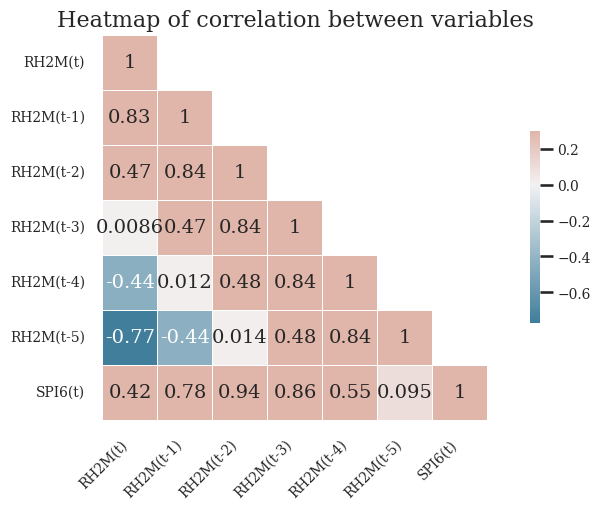

In [42]:
# Compute the correlation matrix : SPI6 and lag RH2M

dfm3 = lagged_data[['RH2M(t)','RH2M(t-1)', 'RH2M(t-2)', 'RH2M(t-3)','RH2M(t-4)', 'RH2M(t-5)','SPI6(t)']]

corr = dfm3.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [43]:
np.abs(dfm3.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
RH2M(t-2)    0.939124
RH2M(t-3)    0.855721
RH2M(t-1)    0.784255
RH2M(t-4)    0.549900
RH2M(t)      0.424884
RH2M(t-5)    0.094875
Name: SPI6(t), dtype: float64

le lag 2 RH2M(t-2) est le plus correlé avec un coefficient de     0.93

In [44]:
lagged_selected_columns.append('RH2M(t-2)')

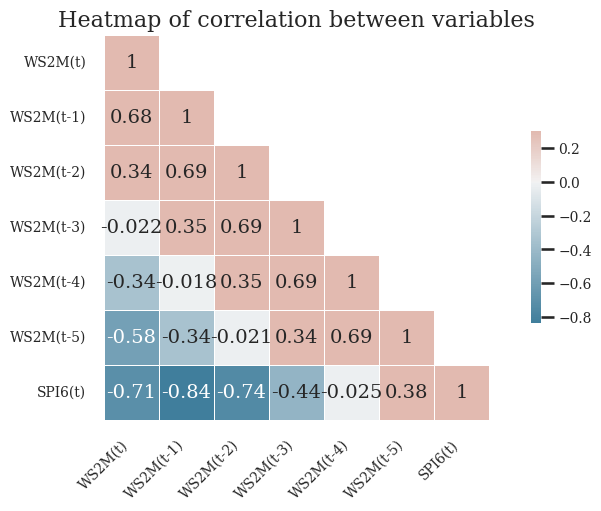

In [45]:
# Compute the correlation matrix : SPI6 and lag WS2M

dfm4 = lagged_data[['WS2M(t)','WS2M(t-1)', 'WS2M(t-2)', 'WS2M(t-3)','WS2M(t-4)', 'WS2M(t-5)','SPI6(t)']]

corr = dfm4.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [46]:
np.abs(dfm4.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
WS2M(t-1)    0.836822
WS2M(t-2)    0.743673
WS2M(t)      0.708426
WS2M(t-3)    0.444329
WS2M(t-5)    0.379261
WS2M(t-4)    0.024886
Name: SPI6(t), dtype: float64

le lag 1 WS2M(t-1)  est le plus correlé avec SPI6(t)  : 0.83

In [47]:
lagged_selected_columns.append('WS2M(t-1)')

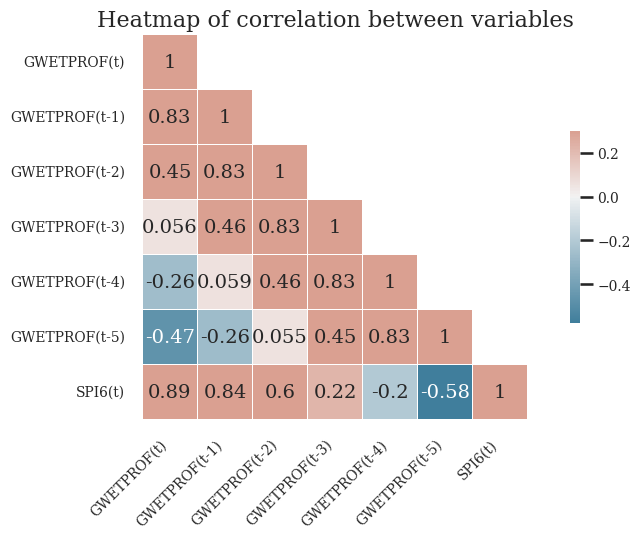

In [48]:
# Compute the correlation matrix : SPI6 and lag GWETPROF

dfm5 = lagged_data[['GWETPROF(t)','GWETPROF(t-1)', 'GWETPROF(t-2)', 'GWETPROF(t-3)','GWETPROF(t-4)', 'GWETPROF(t-5)','SPI6(t)']]

corr = dfm5.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [49]:
np.abs(dfm5.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)          1.000000
GWETPROF(t)      0.892391
GWETPROF(t-1)    0.841921
GWETPROF(t-2)    0.597262
GWETPROF(t-5)    0.575813
GWETPROF(t-3)    0.224043
GWETPROF(t-4)    0.204030
Name: SPI6(t), dtype: float64

le lag 0 est le plus correlé : GWETPROF(t)      0.89

In [50]:
lagged_selected_columns.append('GWETPROF(t)')

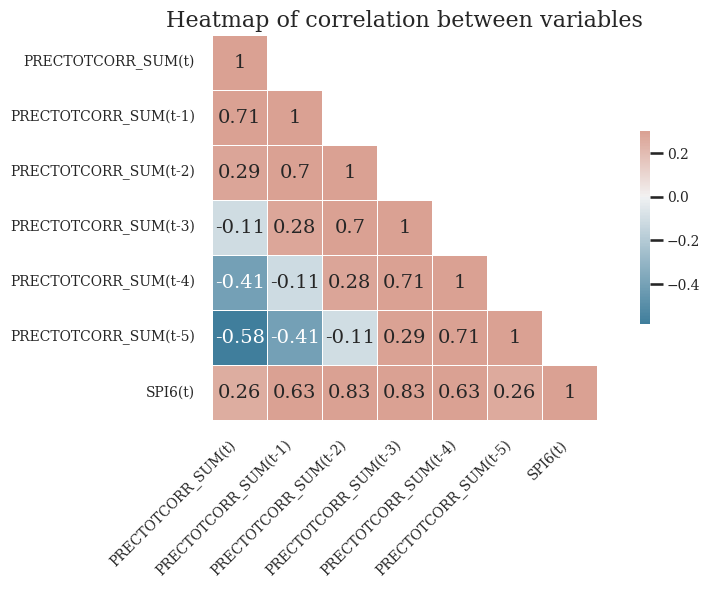

In [51]:
# Compute the correlation matrix : SPI6 and lag PRECTOTCORR_SUM

dfm6 = lagged_data[['PRECTOTCORR_SUM(t)','PRECTOTCORR_SUM(t-1)', 'PRECTOTCORR_SUM(t-2)', 
                    'PRECTOTCORR_SUM(t-3)','PRECTOTCORR_SUM(t-4)', 'PRECTOTCORR_SUM(t-5)','SPI6(t)']]

corr = dfm6.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [52]:
np.abs(dfm6.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)                 1.000000
PRECTOTCORR_SUM(t-3)    0.833438
PRECTOTCORR_SUM(t-2)    0.831156
PRECTOTCORR_SUM(t-4)    0.634403
PRECTOTCORR_SUM(t-1)    0.627359
PRECTOTCORR_SUM(t-5)    0.264000
PRECTOTCORR_SUM(t)      0.255719
Name: SPI6(t), dtype: float64

le lag 3 est le plus correllé PRECTOTCORR_SUM(t-3)    0.83

In [53]:
lagged_selected_columns.append('PRECTOTCORR_SUM(t-3)')

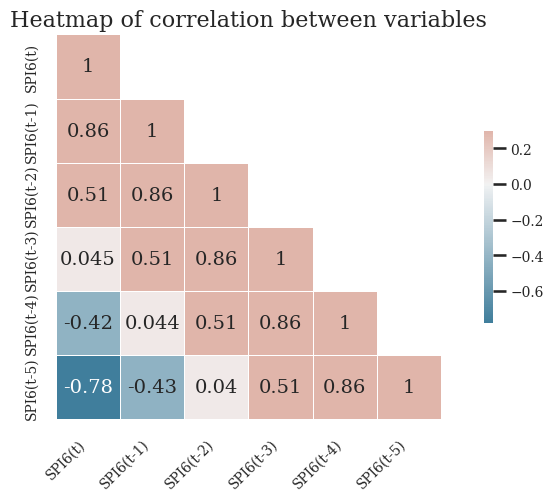

In [54]:
# Compute the correlation matrix : SPI6 and lag SPI6

dfm7 = lagged_data[['SPI6(t)','SPI6(t-1)', 'SPI6(t-2)', 
                    'SPI6(t-3)','SPI6(t-4)', 'SPI6(t-5)']]

corr = dfm7.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [55]:
np.abs(dfm7.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
SPI6(t-1)    0.862945
SPI6(t-5)    0.781227
SPI6(t-2)    0.511693
SPI6(t-4)    0.424630
SPI6(t-3)    0.045111
Name: SPI6(t), dtype: float64

##### le lag 1 est le plus correllé SPI6(t-1)    0.862

In [56]:
lagged_selected_columns.append('SPI6(t-1)')

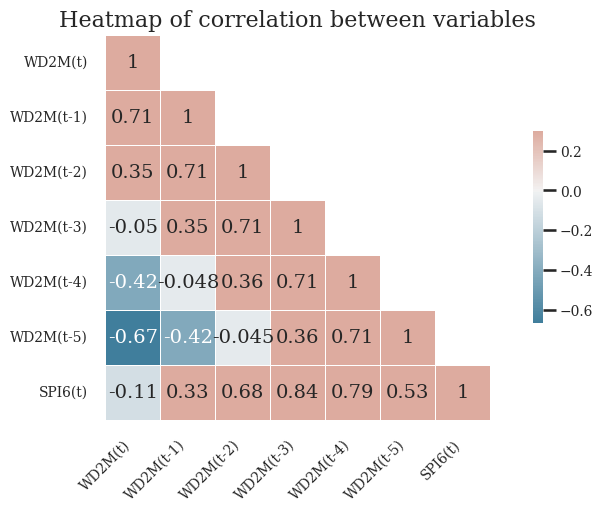

In [57]:
# Compute the correlation matrix : SPI6 and lag SPI6

dfm8 = lagged_data[['WD2M(t)','WD2M(t-1)', 'WD2M(t-2)', 
                    'WD2M(t-3)','WD2M(t-4)', 'WD2M(t-5)', 'SPI6(t)']]
corr = dfm8.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))
plt.title('Heatmap of correlation between variables',fontsize=16)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [58]:
np.abs(dfm8.corr()['SPI6(t)']).sort_values(ascending=False)

SPI6(t)      1.000000
WD2M(t-3)    0.843513
WD2M(t-4)    0.794230
WD2M(t-2)    0.678789
WD2M(t-5)    0.527812
WD2M(t-1)    0.334762
WD2M(t)      0.111319
Name: SPI6(t), dtype: float64

##### The 3rd lag has the highest correlation of 0.843

In [59]:
lagged_selected_columns.append('WD2M(t-3)')

New dataset by choosing each  new lag

In [60]:
#lagged_selected_columns, 
len(lagged_selected_columns)

9

In [61]:
print(lagged_selected_columns)

['SPI6(t)', 'PS(t-1)', 'T2M(t)', 'RH2M(t-2)', 'WS2M(t-1)', 'GWETPROF(t)', 'PRECTOTCORR_SUM(t-3)', 'SPI6(t-1)', 'WD2M(t-3)']


In [62]:
final_lagged_data = lagged_data[lagged_selected_columns] 

final_lagged_data

,SPI6(t),PS(t-1),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1),WD2M(t-3)
DATE,,,,,,,,,
1981-11-30,1.330927,0.047619,-0.528418,0.912302,-0.814516,-0.1250,0.342477,1.652523,0.599968
1981-12-31,0.721630,0.190476,-0.534562,0.695945,-0.379032,-0.4375,-0.205476,1.330927,0.504772
1982-01-31,-0.141574,0.166667,-0.462366,0.152715,-0.419355,-0.6250,-1.000000,0.721630,0.308766
1982-02-28,-0.886282,0.095238,-0.175115,-0.192577,0.048387,-0.7500,-1.000000,-0.141574,-0.551367
1982-03-31,-1.326341,-0.166667,0.262673,-0.567010,-0.088710,-0.8125,-1.000000,-0.886282,-0.602534
...,...,...,...,...,...,...,...,...,...
2021-08-31,1.042519,0.452381,-0.301075,0.628866,-0.322581,0.0000,-0.635702,-0.016338,0.460662
2021-09-30,1.545549,0.357143,-0.236559,0.835052,-0.717742,0.5000,-0.183915,1.042519,0.399471
2021-10-31,1.574756,0.309524,-0.021505,0.984605,-0.887097,0.3125,0.012625,1.545549,0.592429


In [63]:
lagged_data_path = data_params['data_path'] + 'lagged/' + data_params['city'] + '_lagged.csv'
final_lagged_data.to_csv(lagged_data_path)

In [66]:
pd.read_csv('../datasets/lagged/Gogounou_lagged.csv')

,DATE,SPI6(t),PS(t-1),T2M(t),RH2M(t-2),WS2M(t-1),GWETPROF(t),PRECTOTCORR_SUM(t-3),SPI6(t-1),WD2M(t-3)
0,1981-11-30,1.330927,0.047619,-0.528418,0.912302,-0.814516,-0.1250,0.342477,1.652523,0.599968
1,1981-12-31,0.721630,0.190476,-0.534562,0.695945,-0.379032,-0.4375,-0.205476,1.330927,0.504772
2,1982-01-31,-0.141574,0.166667,-0.462366,0.152715,-0.419355,-0.6250,-1.000000,0.721630,0.308766
3,1982-02-28,-0.886282,0.095238,-0.175115,-0.192577,0.048387,-0.7500,-1.000000,-0.141574,-0.551367
4,1982-03-31,-1.326341,-0.166667,0.262673,-0.567010,-0.088710,-0.8125,-1.000000,-0.886282,-0.602534
...,...,...,...,...,...,...,...,...,...,...
477,2021-08-31,1.042519,0.452381,-0.301075,0.628866,-0.322581,0.0000,-0.635702,-0.016338,0.460662
478,2021-09-30,1.545549,0.357143,-0.236559,0.835052,-0.717742,0.5000,-0.183915,1.042519,0.399471
479,2021-10-31,1.574756,0.309524,-0.021505,0.984605,-0.887097,0.3125,0.012625,1.545549,0.592429
480,2021-11-30,1.353587,0.047619,-0.033794,0.922474,-0.943548,-0.1250,0.713996,1.574756,0.583447
